## Analysis of Ratings and Sentiment Analysis Data
### This analysis answers the following questions
User ratings
<ol>
    <li>What are the overall ratings of the app?</li>
    <li>How have the ratings improved over the years?</li>
    <li>How have the ratings improved over the app versions?</li>
</ol>
User sentiments
<ol>
    <li>What are the overall sentiments of the users?</li>
    <li>How have the user sentiments changed over the app versions?</li>
    <li>How have the user sentiments changed over the years?</li>
</ol>

In [1]:
# importing required library
import pandas as pd

In [2]:
# importing the dataset
reviews_df = pd.read_csv("final.csv")

In [3]:
# displaying the top 5 rows of the dataset
reviews_df.head()

,userReview,score,thumbsUpCount,reviewCreatedVersion,review_datetime,replyContent,repliedAt,sentimentRating,sentimentScore
0,Easy and convenience. Anyone can easily fill i...,5,0,2.6.2,24-07-2023 19:20,NaN,NaN,5 star,0.666581
1,Awesome!!,5,0,2.6.2,24-07-2023 13:26,NaN,NaN,5 star,0.876917
2,marvelous great experience soooooooo smooooooth,5,0,2.6.2,24-07-2023 12:47,NaN,NaN,5 star,0.836727
3,Wazirx india crypto platform is not available....,1,0,2.6.2,24-07-2023 10:30,"Hey Abhay, Nachiketa here. I'm the developer o...",24-07-2023 11:36,1 star,0.364124
4,App is good and simple but not showing angel o...,5,0,2.6.2,24-07-2023 07:35,Hey there! AngelOne integration is now live on...,24-07-2023 21:05,3 star,0.399737


---
## User ratings
### 1. What are the overall ratings of the app?

In [4]:
# importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

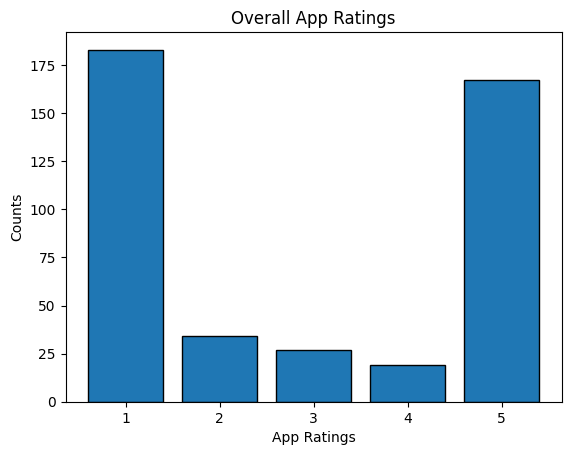

In [37]:
# visualizing the overall scores (actual distribution)
data = reviews_df['score']

# counting the occurance of each user rating
value_counts = Counter(data)
values = list(value_counts.keys())
counts = list(value_counts.values())

# plotting a barplot
plt.bar(values, counts, align='center', edgecolor='black')

# assigning axes labels
plt.xlabel('App Ratings')
plt.ylabel('Counts')
plt.title('Overall App Ratings')

# displaying the barplot
plt.show()

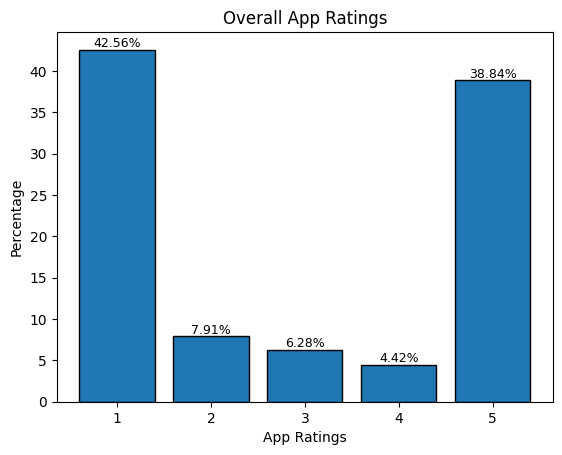

In [38]:
# visualizing the overall scores (percentage distribution)
data = reviews_df['score']

# counting the occurance of each user rating and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# plotting a barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning axes labels
plt.xlabel('App Ratings')
plt.ylabel('Percentage')
plt.title('Overall App Ratings')

# displaying the percentage values on each bar
for index, value in enumerate(value_counts):
    plt.text(index + 1, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()

### 2. How have the ratings changed over the years? (Trend Analysis)

In [6]:
# converting review_datetime to datetime type
reviews_df['review_datetime'] = pd.to_datetime(reviews_df['review_datetime'], format='%d-%m-%Y %H:%M')

# extracting the year from review_datetime and adding it to new column
reviews_df['review_year'] = reviews_df['review_datetime'].dt.year

In [7]:
# displaying the top 5 rows of the dataset
reviews_df.head()

,userReview,score,thumbsUpCount,reviewCreatedVersion,review_datetime,replyContent,repliedAt,sentimentRating,sentimentScore,review_year
0,Easy and convenience. Anyone can easily fill i...,5,0,2.6.2,2023-07-24 19:20:00,NaN,NaN,5 star,0.666581,2023
1,Awesome!!,5,0,2.6.2,2023-07-24 13:26:00,NaN,NaN,5 star,0.876917,2023
2,marvelous great experience soooooooo smooooooth,5,0,2.6.2,2023-07-24 12:47:00,NaN,NaN,5 star,0.836727,2023
3,Wazirx india crypto platform is not available....,1,0,2.6.2,2023-07-24 10:30:00,"Hey Abhay, Nachiketa here. I'm the developer o...",24-07-2023 11:36,1 star,0.364124,2023
4,App is good and simple but not showing angel o...,5,0,2.6.2,2023-07-24 07:35:00,Hey there! AngelOne integration is now live on...,24-07-2023 21:05,3 star,0.399737,2023


In [40]:
# creating a new dataframe with the required subset of data
required_df = reviews_df[['score', 'review_year']]

In [41]:
# displaying the new dataframe
required_df.head()

,score,review_year
0,5,2023
1,5,2023
2,5,2023
3,1,2023
4,5,2023


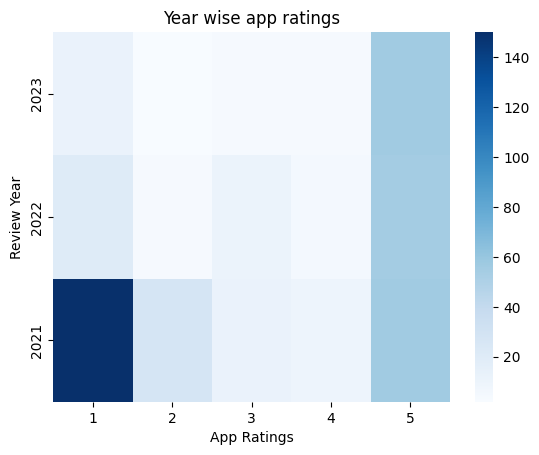

In [42]:
# creating a pivot table of ratings by year
pivot_table = pd.pivot_table(required_df, values='score', index='review_year', columns='score', aggfunc=len, fill_value=0)

# sorting the pivot table by index in descending order
pivot_table = pivot_table.sort_index(ascending=False)

# creating a heatmap of sentiment ratings by version
sns.heatmap(pivot_table, cmap='Blues')

# assigning axes labels
plt.xlabel('App Ratings')
plt.ylabel('Review Year')
plt.title('Year wise app ratings')

# displaying the heatmap plot
plt.show()

<Figure size 1000x600 with 0 Axes>

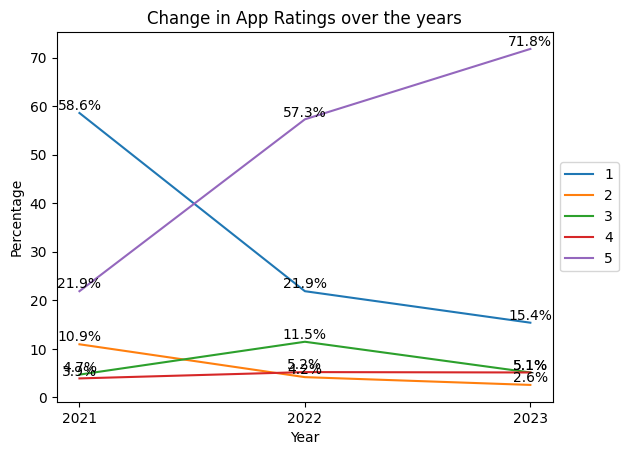

In [45]:
# counting the number of occurrences of each rating value for each review_year
counts = required_df.groupby(['review_year', 'score']).size()

# unstacking the counts to create a dataframe with review_year as index and rating as columns
counts_df = counts.unstack('score')

# calculating the percentage of each rating value in each row
counts_df = counts_df.apply(lambda row: row / row.sum() * 100, axis=1)

# creating a line chart
counts_df.plot(kind='line')

# setting the title and axis labels
plt.title('Change in App Ratings over the years')
plt.xlabel('Year')
plt.ylabel('Percentage')

# setting the x-axis tick locations and labels
plt.xticks([2021, 2022, 2023], ['2021', '2022', '2023'])

# adding annotations for each rating value
for sentiment in counts_df.columns:
    for year, percent in counts_df[sentiment].items():
        plt.annotate('{:.1f}%'.format(percent), xy=(year, percent), ha='center', va='bottom', fontsize=10)

# displaying the legend outside the chart area
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# displaying the plot
plt.show()

### 3. How have the ratings changed over the app versions? (Trend Analysis)

In [30]:
# creating a new dataframe with the required subset of data
required_df = reviews_df[['score', 'reviewCreatedVersion']]

In [31]:
# displaying the top 5 rows of the new dataframe
required_df.head()

,score,reviewCreatedVersion
0,5,2.6.2
1,5,2.6.2
2,5,2.6.2
3,1,2.6.2
4,5,2.6.2


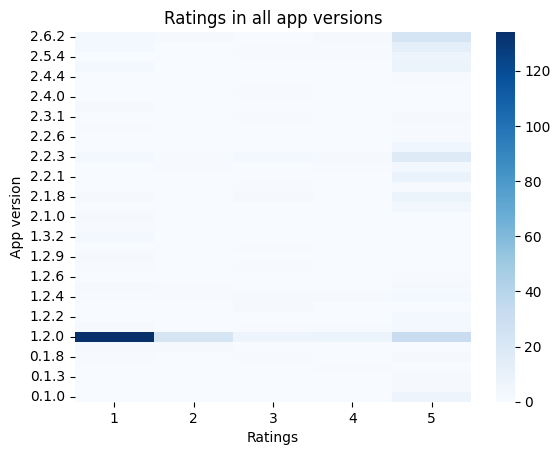

In [32]:
# creating a pivot table of ratings by app version
pivot_table = pd.pivot_table(required_df, values='score', index='reviewCreatedVersion', columns='score', aggfunc=len, fill_value=0)

# sorting the pivot table by index in descending order
pivot_table = pivot_table.sort_index(ascending=False)

# creating a heatmap of sentiment ratings by version
sns.heatmap(pivot_table, cmap='Blues')

# assigning names to axes
plt.xlabel('Ratings')
plt.ylabel('App version')
plt.title('Ratings in all app versions')

# displaying the heatmap plot
plt.show()

In [33]:
# counting the app ratings in each app version
value_counts = required_df['reviewCreatedVersion'].value_counts().sort_index(ascending=False)
print(value_counts)

2.6.2     30
2.6.0     18
2.5.4      9
2.5.2     11
2.4.4      1
2.4.2      1
2.4.0      1
2.3.2      2
2.3.1      3
2.3.0      2
2.2.6      1
2.2.5      5
2.2.3     26
2.2.2      6
2.2.1      9
2.2.0      2
2.1.8     12
2.1.5      4
2.1.0      2
2.0.4      1
1.3.2      3
1.3.0      1
1.2.9      2
1.2.7      2
1.2.6      1
1.2.5      5
1.2.4      9
1.2.3      2
1.2.2      3
1.2.1      7
1.2.0    203
0.1.9      4
0.1.8      4
0.1.5      1
0.1.3      2
0.1.1      2
0.1.0      7
Name: reviewCreatedVersion, dtype: int64


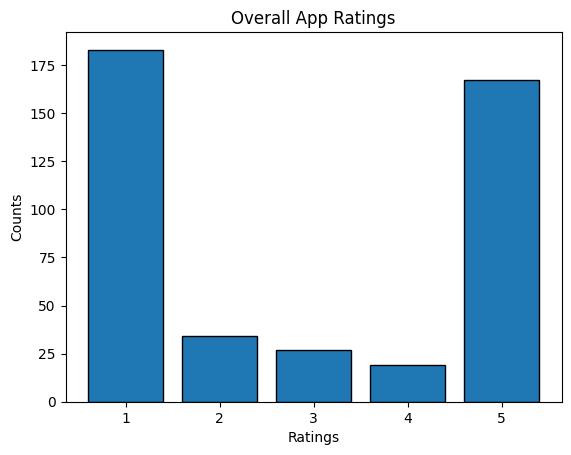

In [34]:
# visualizing the overall app ratings (actual distribution)
data = reviews_df['score']

# counting the occurance of each app rating
value_counts = Counter(data)
values = list(value_counts.keys())
counts = list(value_counts.values())

# plotting the barplot
plt.bar(values, counts, align='center', edgecolor='black')

# assigning the axes labels
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Overall App Ratings')

# dsplaying the barplot
plt.show()

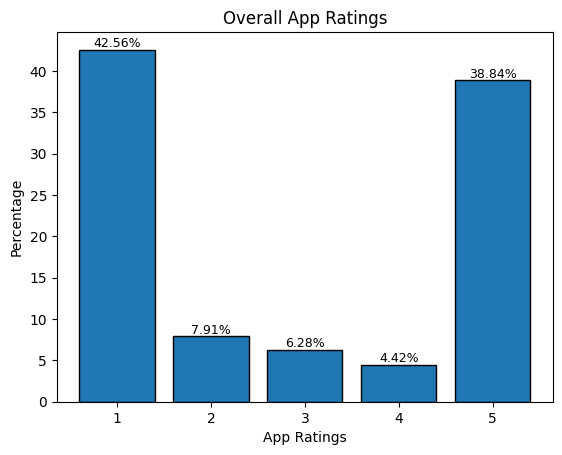

In [36]:
# visualizing the overall app ratings (percentage distribution)
data = reviews_df['score']

# counting the occurance of each app rating and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# plotting the barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning the axes labels
plt.xlabel('App Ratings')
plt.ylabel('Percentage')
plt.title('Overall App Ratings')

# displaying the percentage over each bar
for index, value in enumerate(value_counts):
    plt.text(index + 1, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()

---
## User sentiments
### 1. What are the overall sentiments of user reviews?

In [47]:
# displaying the top 5 rows of the dataset
reviews_df.head()

,userReview,score,thumbsUpCount,reviewCreatedVersion,review_datetime,replyContent,repliedAt,sentimentRating,sentimentScore
0,Easy and convenience. Anyone can easily fill i...,5,0,2.6.2,24-07-2023 19:20,NaN,NaN,5 star,0.666581
1,Awesome!!,5,0,2.6.2,24-07-2023 13:26,NaN,NaN,5 star,0.876917
2,marvelous great experience soooooooo smooooooth,5,0,2.6.2,24-07-2023 12:47,NaN,NaN,5 star,0.836727
3,Wazirx india crypto platform is not available....,1,0,2.6.2,24-07-2023 10:30,"Hey Abhay, Nachiketa here. I'm the developer o...",24-07-2023 11:36,1 star,0.364124
4,App is good and simple but not showing angel o...,5,0,2.6.2,24-07-2023 07:35,Hey there! AngelOne integration is now live on...,24-07-2023 21:05,3 star,0.399737


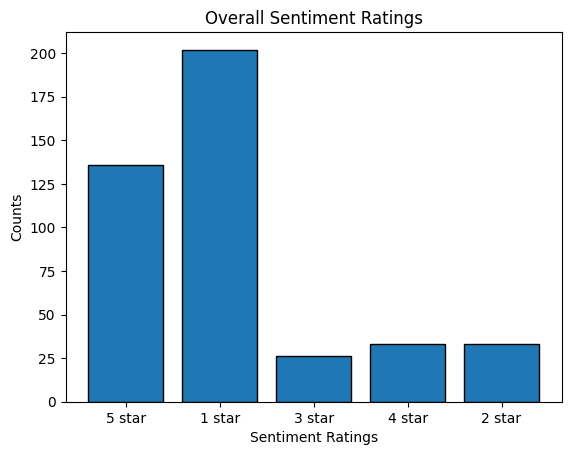

In [54]:
# visualizing the overall sentiment ratings (actual distribution)
data = reviews_df['sentimentRating']

# counting the occurance of each sentiment ratings
value_counts = Counter(data)
values = list(value_counts.keys())
counts = list(value_counts.values())

# plotting a barplot
plt.bar(values, counts, align='center', edgecolor='black')

# assigning axes labels
plt.xlabel('Sentiment Ratings')
plt.ylabel('Counts')
plt.title('Overall Sentiment Ratings')

# displaying the barplot
plt.show()

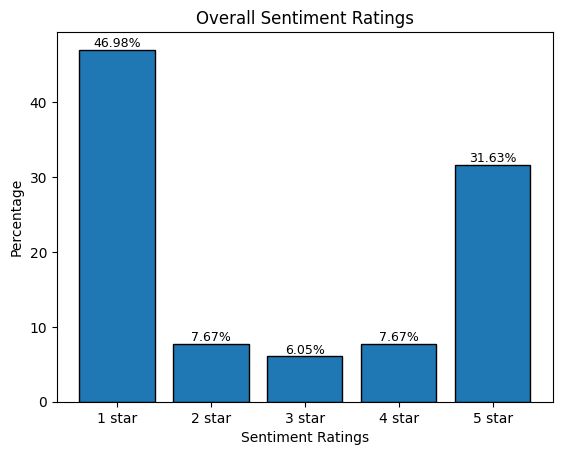

In [55]:
# visualizing the overall sentiment ratings (percentage distribution)
data = reviews_df['sentimentRating']

# counting the sentiment rating and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# plotting the barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning the axes labels
plt.xlabel('Sentiment Ratings')
plt.ylabel('Percentage')
plt.title('Overall Sentiment Ratings')

# displaying the percentage over each bar
for index, value in enumerate(value_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()

#### Substitution:

<table align="left">
  <thead>
    <tr>
      <th>Rating</th>
      <th>Label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>5, 4 star</td>
      <td>Positive</td>
    </tr>
    <tr>
      <td>3 star</td>
      <td>Neutral</td>
    </tr>
    <tr>
      <td>2, 1 star</td>
      <td>Negative</td>
    </tr>
  </tbody>
</table>

In [56]:
# assigning the labels according to the assumed substitution
replace_dict = {'5 star': 'Positive', '4 star': 'Positive', '3 star': 'Neutral', '2 star': 'Negative', '1 star': 'Negative'}
reviews_df['sentimentRating'] = reviews_df['sentimentRating'].replace(replace_dict)

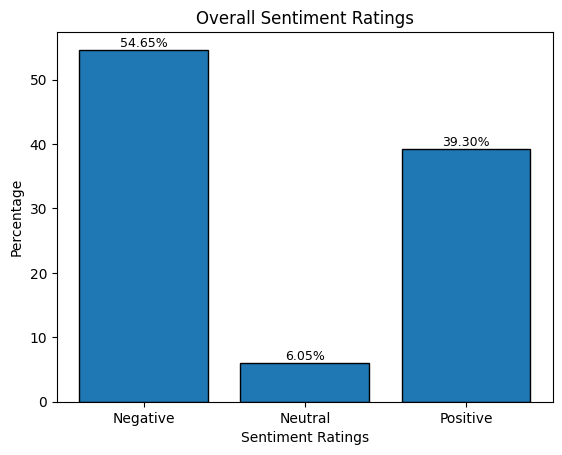

In [57]:
# visualizing the overall sentiment ratings (percentage distribution)
data = reviews_df['sentimentRating']

# counting the occurance of each sentiment rating and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# displaying the barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning the axes labels
plt.xlabel('Sentiment Ratings')
plt.ylabel('Percentage')
plt.title('Overall Sentiment Ratings')

# displaying the percentage over each bar
for index, value in enumerate(value_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()

---
### 2. How have user sentiments changed over newer app versions? (Trend Analysis)

In [58]:
# displaying the top 5 rows of the dataset
reviews_df.head()

,userReview,score,thumbsUpCount,reviewCreatedVersion,review_datetime,replyContent,repliedAt,sentimentRating,sentimentScore
0,Easy and convenience. Anyone can easily fill i...,5,0,2.6.2,24-07-2023 19:20,NaN,NaN,Positive,0.666581
1,Awesome!!,5,0,2.6.2,24-07-2023 13:26,NaN,NaN,Positive,0.876917
2,marvelous great experience soooooooo smooooooth,5,0,2.6.2,24-07-2023 12:47,NaN,NaN,Positive,0.836727
3,Wazirx india crypto platform is not available....,1,0,2.6.2,24-07-2023 10:30,"Hey Abhay, Nachiketa here. I'm the developer o...",24-07-2023 11:36,Negative,0.364124
4,App is good and simple but not showing angel o...,5,0,2.6.2,24-07-2023 07:35,Hey there! AngelOne integration is now live on...,24-07-2023 21:05,Neutral,0.399737


In [59]:
# creating a new dataframe with the required columns (reviewCreatedVersion and sentimentRating)
required_df = reviews_df[['reviewCreatedVersion', 'sentimentRating']]

In [60]:
# displaying the top 5 rows of the new dataframe
required_df.head()

,reviewCreatedVersion,sentimentRating
0,2.6.2,Positive
1,2.6.2,Positive
2,2.6.2,Positive
3,2.6.2,Negative
4,2.6.2,Neutral


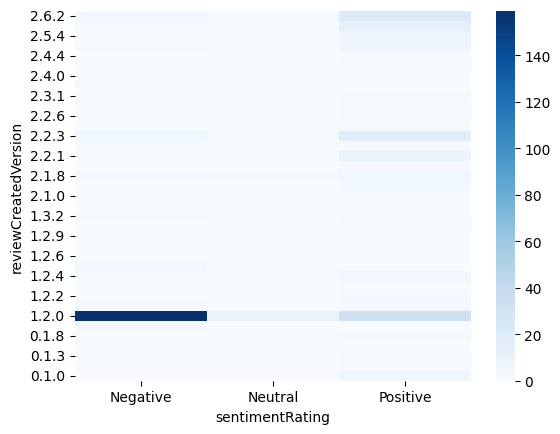

In [68]:
# creating a pivot table of sentiment ratings by version
pivot_table = pd.pivot_table(required_df, values='sentimentRating', index='reviewCreatedVersion', columns='sentimentRating', aggfunc=len, fill_value=0)

# sorting the pivot table by index in descending order
pivot_table = pivot_table.sort_index(ascending=False)

# creating a heatmap of sentiment ratings by version
sns.heatmap(pivot_table, cmap='Blues')

# assigning names to axes
plt.xlabel('Sentiment Ratings')
plt.ylabel('App version')
plt.title('Sentiments in all app versions')

# displaying the heatmap plot
plt.show()

#### Analysing the newest 2 versions of the app

In [77]:
# counting the occurance of each app version
value_counts = required_df['reviewCreatedVersion'].value_counts().sort_index(ascending=False)
print(value_counts)

2.6.2     30
2.6.0     18
2.5.4      9
2.5.2     11
2.4.4      1
2.4.2      1
2.4.0      1
2.3.2      2
2.3.1      3
2.3.0      2
2.2.6      1
2.2.5      5
2.2.3     26
2.2.2      6
2.2.1      9
2.2.0      2
2.1.8     12
2.1.5      4
2.1.0      2
2.0.4      1
1.3.2      3
1.3.0      1
1.2.9      2
1.2.7      2
1.2.6      1
1.2.5      5
1.2.4      9
1.2.3      2
1.2.2      3
1.2.1      7
1.2.0    203
0.1.9      4
0.1.8      4
0.1.5      1
0.1.3      2
0.1.1      2
0.1.0      7
Name: reviewCreatedVersion, dtype: int64


In [85]:
# app versions 2.6.x
app_ver_1 = required_df[required_df['reviewCreatedVersion'].str.contains('2.6').fillna(False)]

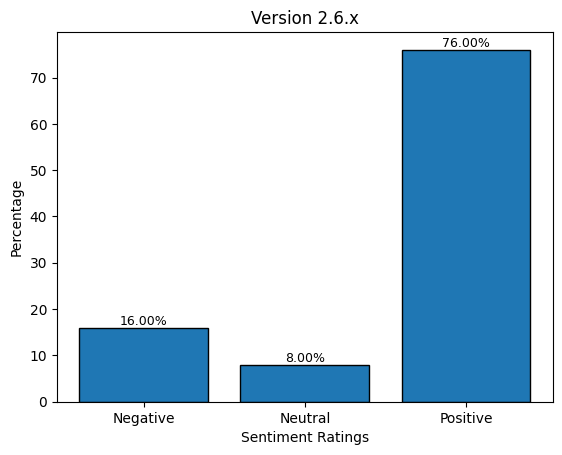

In [87]:
# visualizing the overall sentiment ratings (percentage distribution)
data = app_ver_1['sentimentRating']

# counting the occurance of each sentiment rating for app version 2.6.x and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# plotting a barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning the axes labels
plt.xlabel('Sentiment Ratings')
plt.ylabel('Percentage')
plt.title('Version 2.6.x')

# displaying the percentage over each bar
for index, value in enumerate(value_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()

In [88]:
# app versions 2.5.x
app_ver_1 = required_df[required_df['reviewCreatedVersion'].str.contains('2.5').fillna(False)]

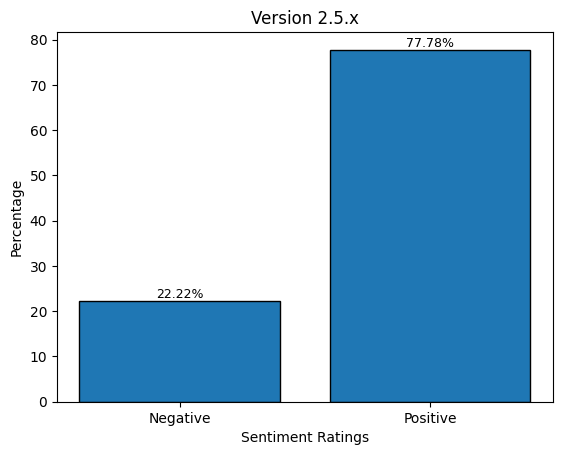

In [89]:
# visualizing the overall sentiment ratings (percentage distribution)
data = app_ver_2['sentimentRating']

# counting the occurance of each sentiment rating for app version 2.5.x and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# plotting a barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning the axes labels
plt.xlabel('Sentiment Ratings')
plt.ylabel('Percentage')
plt.title('Version 2.5.x')

# displaying the percentage over each bar
for index, value in enumerate(value_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()

---
### 3. How have user sentiments changed over the years? (Trend Analysis)

In [91]:
# converting review_datetime to datetime type
reviews_df['review_datetime'] = pd.to_datetime(reviews_df['review_datetime'], format='%d-%m-%Y %H:%M')

# extracting the year from review_datetime and adding it to new column
reviews_df['review_year'] = reviews_df['review_datetime'].dt.year

In [92]:
# displaying teh top 5 rows of the dataset
reviews_df.head()

,userReview,score,thumbsUpCount,reviewCreatedVersion,review_datetime,replyContent,repliedAt,sentimentRating,sentimentScore,review_year
0,Easy and convenience. Anyone can easily fill i...,5,0,2.6.2,2023-07-24 19:20:00,NaN,NaN,Positive,0.666581,2023
1,Awesome!!,5,0,2.6.2,2023-07-24 13:26:00,NaN,NaN,Positive,0.876917,2023
2,marvelous great experience soooooooo smooooooth,5,0,2.6.2,2023-07-24 12:47:00,NaN,NaN,Positive,0.836727,2023
3,Wazirx india crypto platform is not available....,1,0,2.6.2,2023-07-24 10:30:00,"Hey Abhay, Nachiketa here. I'm the developer o...",24-07-2023 11:36,Negative,0.364124,2023
4,App is good and simple but not showing angel o...,5,0,2.6.2,2023-07-24 07:35:00,Hey there! AngelOne integration is now live on...,24-07-2023 21:05,Neutral,0.399737,2023


In [94]:
# creating a new dataframe with required columns (score, sentimentRating, and review_year)
required_df = reviews_df[['reviewCreatedVersion', 'sentimentRating', 'review_year']]

In [95]:
# displaying the top 5 rows of new dataframe
required_df.head()

,reviewCreatedVersion,sentimentRating,review_year
0,2.6.2,Positive,2023
1,2.6.2,Positive,2023
2,2.6.2,Positive,2023
3,2.6.2,Negative,2023
4,2.6.2,Neutral,2023


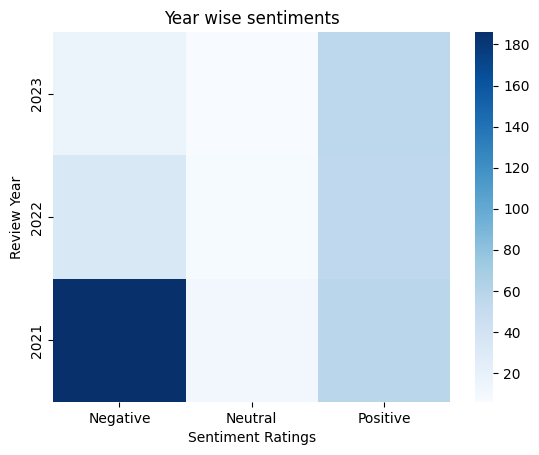

In [101]:
# creating a pivot table of sentiment ratings by version
pivot_table = pd.pivot_table(required_df, values='sentimentRating', index='review_year', columns='sentimentRating', aggfunc=len, fill_value=0)

# sorting the pivot table by index in descending order
pivot_table = pivot_table.sort_index(ascending=False)

# creating a heatmap of sentiment ratings by version
sns.heatmap(pivot_table, cmap='Blues')

# assigning the axes labels
plt.xlabel('Sentiment Ratings')
plt.ylabel('Review Year')
plt.title('Year wise sentiments')

# displaying the heatmap plot
plt.show()

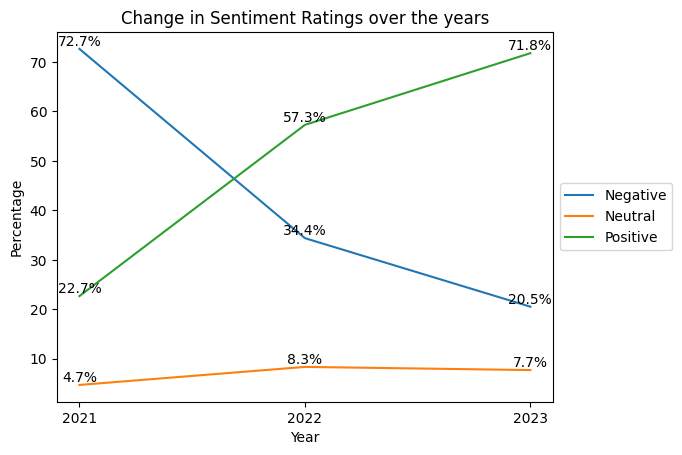

In [121]:
# counting the number of occurrences of each sentimentRating value for each review_year
counts = required_df.groupby(['review_year', 'sentimentRating']).size()

# unstacking the counts to create a dataframe with review_year as index and sentimentRating as columns
counts_df = counts.unstack('sentimentRating')

# calculating the percentage of each sentimentRating value in each row
counts_df = counts_df.apply(lambda row: row / row.sum() * 100, axis=1)

# creating a line chart
counts_df.plot(kind='line')

# setting the title and axis labels
plt.title('Change in Sentiment Ratings over the years')
plt.xlabel('Year')
plt.ylabel('Percentage')

# setting the x-axis tick locations and labels
plt.xticks([2021, 2022, 2023], ['2021', '2022', '2023'])

# adding annotations for each sentimentRating value
for sentiment in counts_df.columns:
    for year, percent in counts_df[sentiment].items():
        plt.annotate('{:.1f}%'.format(percent), xy=(year, percent), ha='center', va='bottom', fontsize=10)

# displaying the legend outside the chart area
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# displaying the plot
plt.show()

#### Analysing each year separately

In [102]:
# creating a new dataframe for year 2021
year_2021 = required_df[required_df['review_year'] == 2021]

In [103]:
# displaying the top 5 rows of the new dataframe
year_2021.head()

,reviewCreatedVersion,sentimentRating,review_year
174,1.2.4,Positive,2021
175,1.2.4,Negative,2021
176,1.2.3,Positive,2021
177,1.2.4,Positive,2021
178,1.2.4,Negative,2021


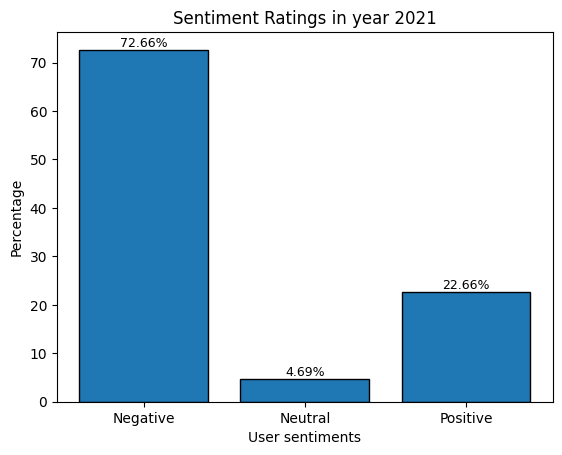

In [105]:
# visualizing the overall sentiment ratings (percentage distribution)
data = year_2021['sentimentRating']

# counting the occurance of sentiment ratings and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# plotting a barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning axes labels
plt.xlabel('User sentiments')
plt.ylabel('Percentage')
plt.title('Sentiment Ratings in year 2021')

# displaying the percentage over each bar
for index, value in enumerate(value_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()

In [106]:
# creating a dataframe for year 2022
year_2022 = required_df[required_df['review_year'] == 2022]

In [107]:
# displaying the new dataframe
year_2022.head()

,reviewCreatedVersion,sentimentRating,review_year
78,2.3.1,Positive,2022
79,2.3.1,Positive,2022
80,2.3.1,Negative,2022
81,2.3.0,Positive,2022
82,NaN,Negative,2022


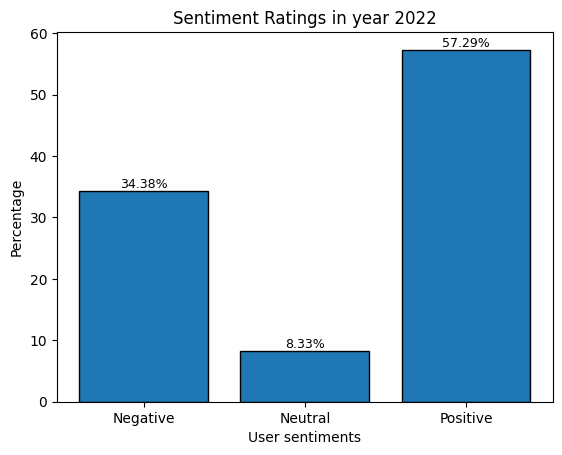

In [109]:
# visualizing the overall sentiment ratings (percentage distribution)
data = year_2022['sentimentRating']

# counting the occurance of sentiment ratings and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# plotting the barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning the axes labels
plt.xlabel('User sentiments')
plt.ylabel('Percentage')
plt.title('Sentiment Ratings in year 2022')

# displaying the percentage values over each bar
for index, value in enumerate(value_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()

In [110]:
# creating a new dataframe for year 2023
year_2023 = required_df[required_df['review_year'] == 2023]

In [111]:
# displaying the top 5 rows of the new dataframe
year_2023.head()

,reviewCreatedVersion,sentimentRating,review_year
0,2.6.2,Positive,2023
1,2.6.2,Positive,2023
2,2.6.2,Positive,2023
3,2.6.2,Negative,2023
4,2.6.2,Neutral,2023


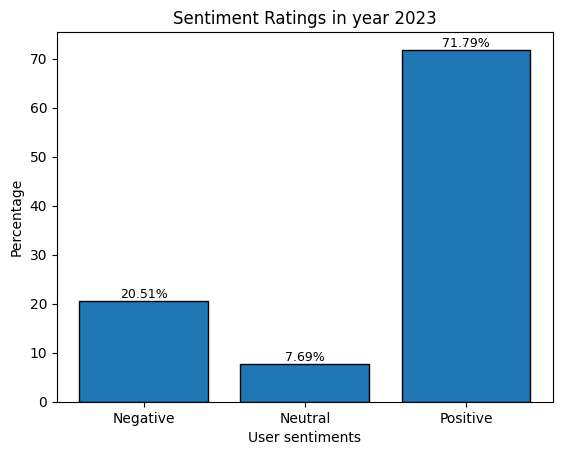

In [112]:
# visualizing the overall sentiment ratings (percentage distribution)
data = year_2023['sentimentRating']

# counting the occurance of each sentiment rating and converting it to percentage
value_counts = pd.Series(data).value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

# plotting the barplot
plt.bar(value_counts.index, value_counts.values, align='center', edgecolor='black')

# assigning the axes labels
plt.xlabel('User sentiments')
plt.ylabel('Percentage')
plt.title('Sentiment Ratings in year 2023')

# displaying the percentage rating over each bar
for index, value in enumerate(value_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# displaying the barplot
plt.show()